# Figure S2

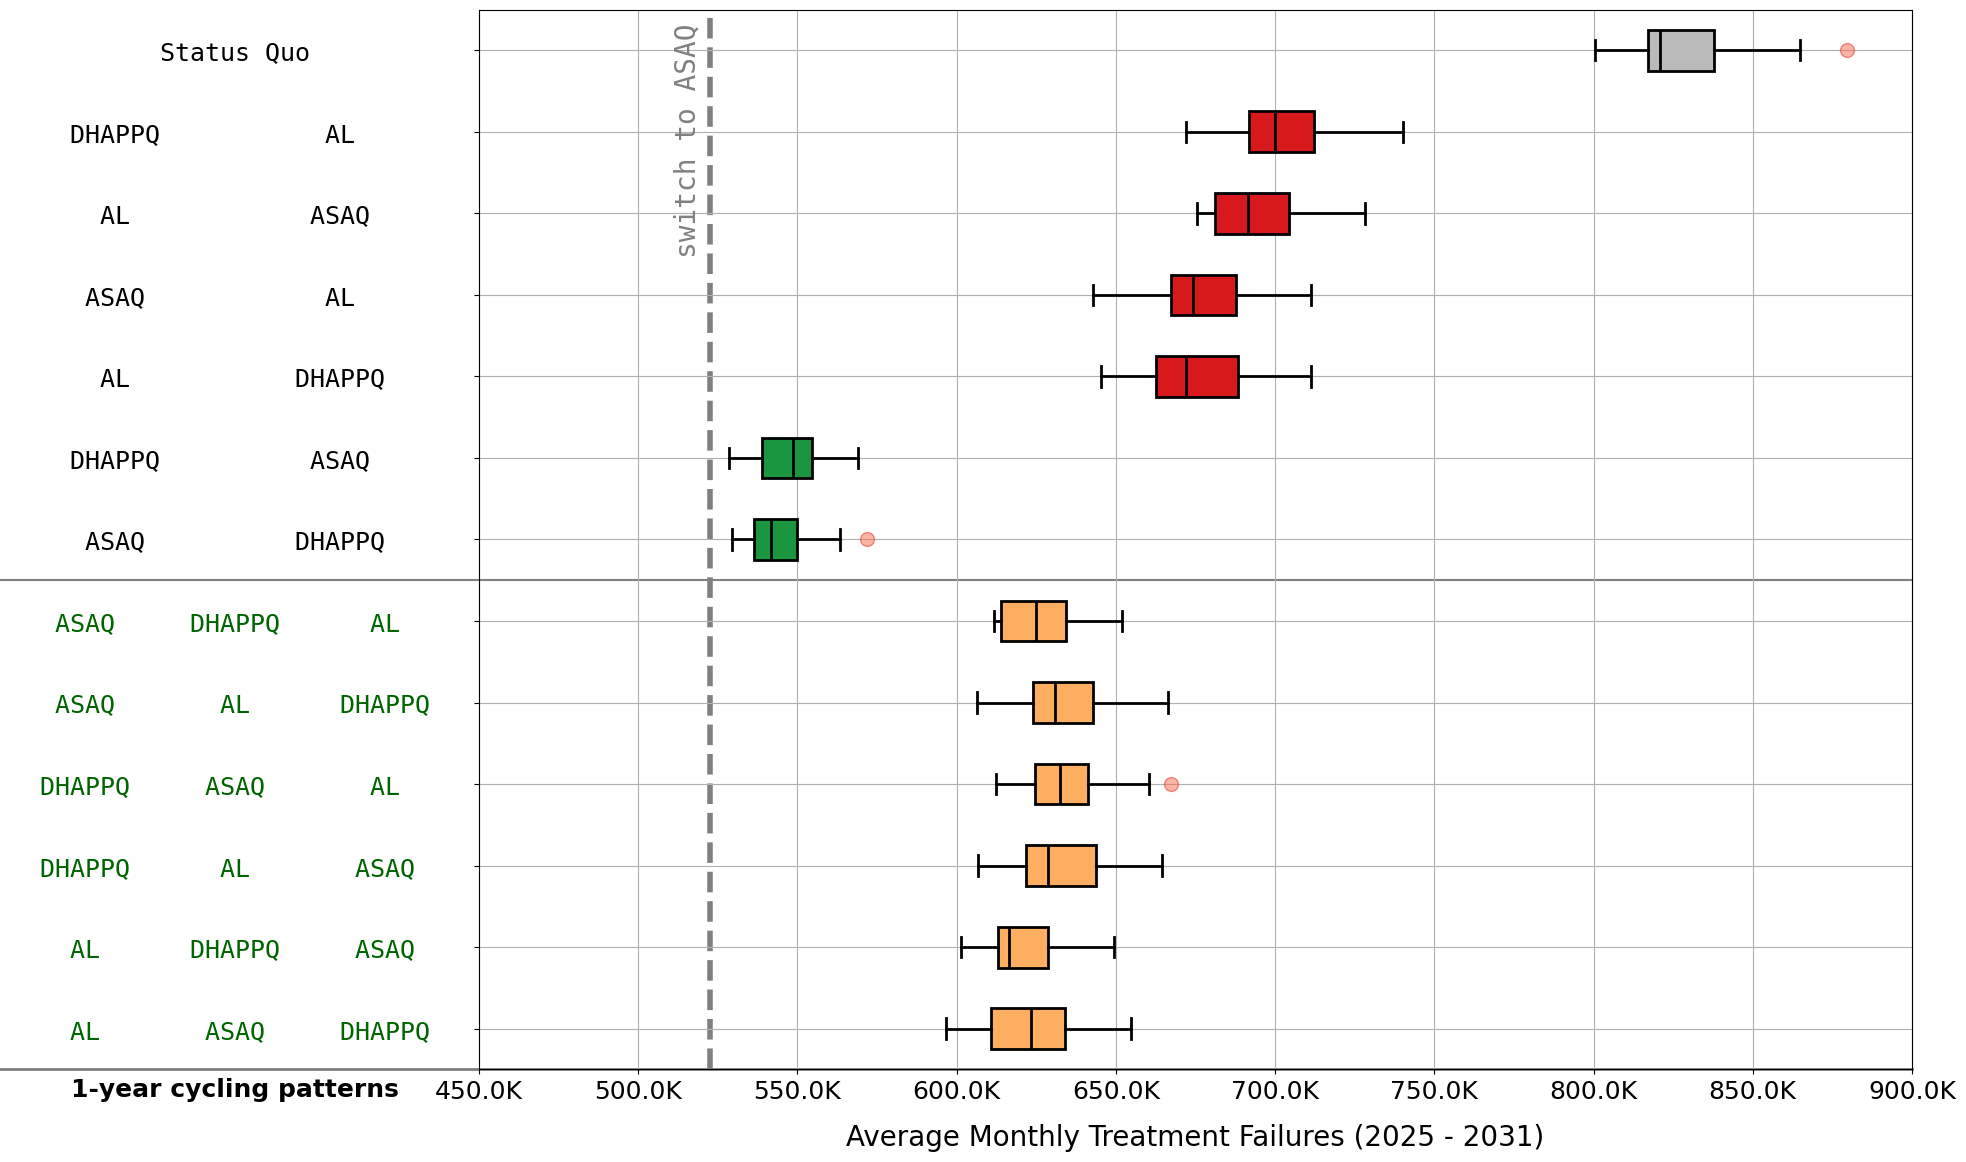

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Custom formatter function for x-axis
def thousands_formatter(x, pos):
    return f'{int(x) / 1e3}K'

cycling_stategies = {
    "cycling_dhappq_al_1y": {"label": "DHAPPQ-AL", "color": "#d7191c", "position": 0},
    "cycling_al_asaq_1y": {"label": "AL-ASAQ", "color": "#d7191c", "position": 0},
    "cycling_asaq_al_1y": {"label": "ASAQ-AL", "color": "#d7191c", "position": 0},
    "cycling_al_dhappq_1y": {"label": "AL-DHAPPQ", "color": "#d7191c", "position": 0},
    "cycling_dhappq_asaq_1y": {"label": "DHAPPQ-ASAQ", "color": "#1a9641", "position": 0},
    "cycling_asaq_dhappq_1y": {"label": "ASAQ-DHAPPQ", "color": "#1a9641", "position": 0},
    "cycling_asaq_dhappq_al_1y": {"label": "ASAQ-DHAPPQ-AL", "color": "#fdae61", "position": 0},
    "cycling_asaq_al_dhappq_1y": {"label": "ASAQ-AL-DHAPPQ", "color": "#fdae61", "position": 0},
    "cycling_dhappq_asaq_al_1y": {"label": "DHAPPQ-ASAQ-AL", "color": "#fdae61", "position": 0},
    "cycling_dhappq_al_asaq_1y": {"label": "DHAPPQ-AL-ASAQ", "color": "#fdae61", "position": 0},
    "cycling_al_dhappq_asaq_1y": {"label": "AL-DHAPPQ-ASAQ", "color": "#fdae61", "position": 0},
    "cycling_al_asaq_dhappq_1y": {"label": "AL-ASAQ-DHAPPQ", "color": "#fdae61", "position": 0},
}

# Setting
corrected_scenario_mapping_dict = {"status_quo": {"label": "Status Quo", "color": "#bababa"}}
corrected_scenario_mapping_dict.update(cycling_stategies)

for i, key in enumerate(corrected_scenario_mapping_dict):
    corrected_scenario_mapping_dict[key]['position'] = -i

group_endings = ["cycling_asaq_dhappq_1y", "cycling_al_asaq_dhappq_1y"]

# Define total width (divisible by 6 for flexibility)
total_width = 30
col_width_3 = total_width // 3  # Width for each column in 3-column rows
col_width_2 = total_width // 2  # Width for each column in 3-column rows

# Extract labels from the dictionary, split by "-" and format them
y_ticks_dynamic = []
for key in corrected_scenario_mapping_dict:
    labels = corrected_scenario_mapping_dict[key]['label'].split('-')
    if len(labels) == 1:  # 1 column
        labels = [labels[0]]
        formatted_label = ''.join([f"{label:^{total_width}}" for label in labels])
    elif len(labels) == 2:  # 2 columns
        # labels.append(labels[0])  # Repeat the first label
        formatted_label = ''.join([f"{label:^{col_width_2}}" for label in labels])
    else:  # 3 columns
        formatted_label = ''.join([f"{label:^{col_width_3}}" for label in labels])
    y_ticks_dynamic.append(formatted_label)

# print(y_ticks_dynamic)
# for label in y_ticks_dynamic:
#     print(f"'{label}' length: {len(label)}")

# Load the dataset
data_path = './data/ntfs_6y.csv'
data_labeled = pd.read_csv(data_path)
data_labeled = data_labeled[(data_labeled["scenario"].isin(corrected_scenario_mapping_dict.keys())) & (data_labeled["year"] == 2031)]
data_labeled["total_treatmentfailures"] = data_labeled["total_treatmentfailures"] / (6 * 12)

data_labeled['position'] = data_labeled['scenario'].apply(lambda x: corrected_scenario_mapping_dict[x]['position'])

# Introduce variables for box width and spacing
box_width = 0.2  # Can be adjusted for narrower or wider boxes
spacing_multiplier = 0.4  # Adjust this to make boxplots closer or further apart
dynamic_positions = {scenario: details["position"] * spacing_multiplier for scenario, details in corrected_scenario_mapping_dict.items()}

# Calculate dynamic positions for dashed lines
adjusted_group_separators = [dynamic_positions[scenario] - 0.5 * spacing_multiplier for scenario in group_endings[:-1]]  # Adjust, exclude last

plt.rcdefaults()
plt.rcParams['font.size'] = 18
lw = 2
outlier_size = 10

# Create the plots with corrected positions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), sharey=False, sharex=False)

for scenario, details in corrected_scenario_mapping_dict.items():
    scenario_data = data_labeled[(data_labeled['scenario'] == scenario) & (data_labeled['year'] == 2031)]['total_treatmentfailures']
    if not scenario_data.empty:
        ax.boxplot(scenario_data, positions=[dynamic_positions[scenario]], 
                   widths=box_width, vert=False, patch_artist=True,
                   boxprops=dict(facecolor=details['color'], color='black', linewidth=lw),
                   whiskerprops=dict(color='black', linewidth=lw),
                   capprops=dict(color='black', linewidth=lw),
                   medianprops=dict(color='black', linewidth=lw),
                   flierprops=dict(marker='o', markerfacecolor='#fb6a4a', markeredgecolor='#de2d26', alpha=0.5, markersize=outlier_size)
                   )
for separator in adjusted_group_separators:
    ax.axhline(y=separator, xmin=-1.2,
                   color='grey', linestyle='-',
                  zorder=0,
                     clip_on=False)
                   


# Set tick positions and custom labels
ax.set_yticks(list(dynamic_positions.values()))
ax.set_yticklabels(y_ticks_dynamic, fontname='monospace') 

# Adjust tick parameters for better padding
ax.tick_params(axis='y', pad=10)

# Change the color of 3-column labels to dark green
for i, tick in enumerate(ax.get_yticklabels()):
    if i > 6:  # First 3 rows are 3-column labels
        tick.set_color("darkgreen")

ax.set_xlim(450000, 900000)
min_y = min(dynamic_positions.values()) - 0.5 * spacing_multiplier
max_y = max(dynamic_positions.values()) + 0.5 * spacing_multiplier
ax.set_ylim(min_y, max_y)

ax.axhline(
    y=min_y,  # Line position
    xmin=-1.2,  # Extend into tick label region
    xmax=1,  # Span across the plot
    c="grey",  # Line color
    linewidth=2,  # Line thickness
    zorder=0,  # Ensure it renders behind the bars
    clip_on=False,  # Allow line to extend beyond axes
)

ax.axvline(
    x=522456,  # Line position
    c="grey",  # Line color
    linewidth=4,  # Line thickness
    linestyle = '--',
    zorder=0,  # Ensure it renders behind the bars
    clip_on=True,  # Allow line to extend beyond axes
)

ax.text(
    520000,  # Position on the x-axis
    -0.44,  # Position on the y-axis
    "switch to ASAQ",
    fontweight="normal",
    fontname='monospace',
    fontsize = 20,
    color="grey",
    rotation=90,
    va="center",
    ha="right",
)
# Add a general label at -0.5
ax.text(
    425000,  # Position on the x-axis
    min_y - 0.25 * spacing_multiplier ,  # Position on the y-axis
    "1-year cycling patterns",
    fontweight="bold",
    color="black",
    va="center",
    ha="right",
)


ax.set_xlabel('Average Monthly Treatment Failures (2025 - 2031)', fontsize=20, labelpad=15)
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Apply the custom formatter
ax.grid(axis='both')

plt.tight_layout()
plt.savefig("figure_S2.png", format="png", dpi=300)
plt.show()

# Figure S3

['          Status Quo          ', '    DHAPPQ           AL       ', '      AL           DHAPPQ     ', '      AL            ASAQ      ', '     ASAQ            AL       ', '    DHAPPQ          ASAQ      ', '     ASAQ          DHAPPQ     ']
'          Status Quo          ' length: 30
'    DHAPPQ           AL       ' length: 30
'      AL           DHAPPQ     ' length: 30
'      AL            ASAQ      ' length: 30
'     ASAQ            AL       ' length: 30
'    DHAPPQ          ASAQ      ' length: 30
'     ASAQ          DHAPPQ     ' length: 30


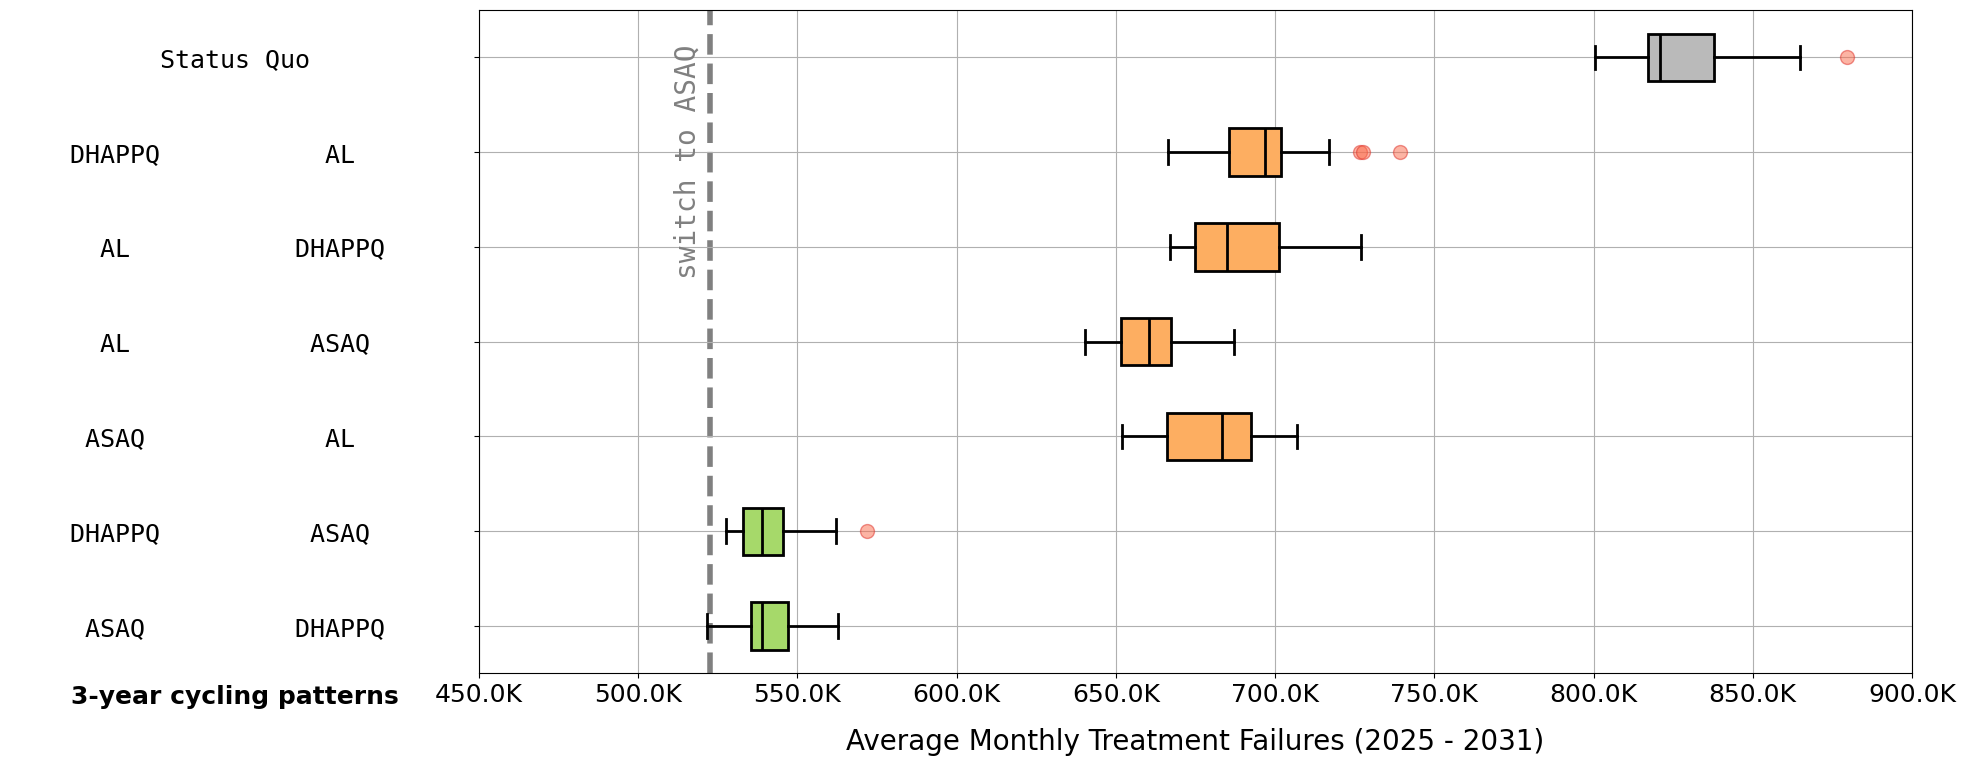

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Custom formatter function for x-axis
def thousands_formatter(x, pos):
    return f'{int(x) / 1e3}K'

cycling_stategies = {
    "cycling_dhappq_al_3y": {"label": "DHAPPQ-AL", "color": "#fdae61", "position": 0},
    "cycling_al_dhappq_3y": {"label": "AL-DHAPPQ", "color": "#fdae61", "position": 0},
    "cycling_al_asaq_3y": {"label": "AL-ASAQ", "color": "#fdae61", "position": 0},
    "cycling_asaq_al_3y": {"label": "ASAQ-AL", "color": "#fdae61", "position": 0},
    "cycling_dhappq_asaq_3y": {"label": "DHAPPQ-ASAQ", "color": "#a6d96a", "position": 0},
    "cycling_asaq_dhappq_3y": {"label": "ASAQ-DHAPPQ", "color": "#a6d96a", "position": 0},
}

# Setting
corrected_scenario_mapping_dict = {"status_quo": {"label": "Status Quo", "color": "#bababa"}}
corrected_scenario_mapping_dict.update(cycling_stategies)

for i, key in enumerate(corrected_scenario_mapping_dict):
    corrected_scenario_mapping_dict[key]['position'] = -i

group_endings = ["cycling_asaq_dhappq_3y"]

# Define total width (divisible by 6 for flexibility)
total_width = 30
col_width_3 = total_width // 2  # Width for each column in 3-column rows

# Extract labels from the dictionary, split by "-" and format them
y_ticks_dynamic = []
for key in corrected_scenario_mapping_dict:
    labels = corrected_scenario_mapping_dict[key]['label'].split('-')
    if len(labels) == 1:  # 1 column
        labels = [f"{labels[0]:^{total_width}}"]
    # elif len(labels) == 2:  # 2 columns
    #     labels.append(labels[0])  # Repeat the first label
    formatted_label = ''.join([f"{label:^{col_width_3}}" for label in labels])
    y_ticks_dynamic.append(formatted_label)

print(y_ticks_dynamic)
for label in y_ticks_dynamic:
    print(f"'{label}' length: {len(label)}")

# Load the dataset
data_path = './data/ntfs_6y.csv'
data_labeled = pd.read_csv(data_path)
data_labeled = data_labeled[(data_labeled["scenario"].isin(corrected_scenario_mapping_dict.keys())) & (data_labeled["year"] == 2031)]
data_labeled["total_treatmentfailures"] = data_labeled["total_treatmentfailures"] / (6 * 12)

data_labeled['position'] = data_labeled['scenario'].apply(lambda x: corrected_scenario_mapping_dict[x]['position'])

# Introduce variables for box width and spacing
box_width = 0.2  # Can be adjusted for narrower or wider boxes
spacing_multiplier = 0.4  # Adjust this to make boxplots closer or further apart
dynamic_positions = {scenario: details["position"] * spacing_multiplier for scenario, details in corrected_scenario_mapping_dict.items()}

# Calculate dynamic positions for dashed lines
adjusted_group_separators = [dynamic_positions[scenario] - 0.5 * spacing_multiplier for scenario in group_endings[:-1]]  # Adjust, exclude last

plt.rcdefaults()
plt.rcParams['font.size'] = 18
lw = 2
outlier_size = 10

# Create the plots with corrected positions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), sharey=False, sharex=False)

for scenario, details in corrected_scenario_mapping_dict.items():
    scenario_data = data_labeled[(data_labeled['scenario'] == scenario) & (data_labeled['year'] == 2031)]['total_treatmentfailures']
    if not scenario_data.empty:
        ax.boxplot(scenario_data, positions=[dynamic_positions[scenario]], 
                   widths=box_width, vert=False, patch_artist=True,
                   boxprops=dict(facecolor=details['color'], color='black', linewidth=lw),
                   whiskerprops=dict(color='black', linewidth=lw),
                   capprops=dict(color='black', linewidth=lw),
                   medianprops=dict(color='black', linewidth=lw),
                   flierprops=dict(marker='o', markerfacecolor='#fb6a4a', markeredgecolor='#de2d26', alpha=0.5, markersize=outlier_size)
                   )
for separator in adjusted_group_separators:
    ax.axhline(y=separator, xmin=-1.2,
                   color='grey', linestyle='-',
                  zorder=0,
                     clip_on=False)
                   


# Set tick positions and custom labels
ax.set_yticks(list(dynamic_positions.values()))
ax.set_yticklabels(y_ticks_dynamic, fontname='monospace') 

# Adjust tick parameters for better padding
ax.tick_params(axis='y', pad=10)

# Change the color of 3-column labels to dark green
for i, tick in enumerate(ax.get_yticklabels()):
    if i > 6:  # First 3 rows are 3-column labels
        tick.set_color("darkgreen")

ax.set_xlim(450000, 900000)
min_y = min(dynamic_positions.values()) - 0.5 * spacing_multiplier
max_y = max(dynamic_positions.values()) + 0.5 * spacing_multiplier
ax.set_ylim(min_y, max_y)

# ax.axhline(
#     y=min_y,  # Line position
#     xmin=-1.2,  # Extend into tick label region
#     xmax=1,  # Span across the plot
#     c="grey",  # Line color
#     linewidth=2,  # Line thickness
#     zorder=0,  # Ensure it renders behind the bars
#     clip_on=False,  # Allow line to extend beyond axes
# )

# ax.axvline(
#     x=391148,  # Line position
#     c="grey",  # Line color
#     linewidth=4,  # Line thickness
#     linestyle = '--',
#     zorder=0,  # Ensure it renders behind the bars
#     clip_on=True,  # Allow line to extend beyond axes
# )
# Add a general label at -0.5
ax.text(
    425000,  # Position on the x-axis
    min_y - 0.25 * spacing_multiplier ,  # Position on the y-axis
    "3-year cycling patterns",
    fontweight="bold",
    color="black",
    va="center",
    ha="right",
)

ax.axvline(
    x=522456,  # Line position
    c="grey",  # Line color
    linewidth=4,  # Line thickness
    linestyle = '--',
    zorder=0,  # Ensure it renders behind the bars
    clip_on=True,  # Allow line to extend beyond axes
)

ax.text(
    520000,  # Position on the x-axis
    -0.44,  # Position on the y-axis
    "switch to ASAQ",
    fontweight="normal",
    fontname='monospace',
    fontsize = 20,
    color="grey",
    rotation=90,
    va="center",
    ha="right",
)


ax.set_xlabel('Average Monthly Treatment Failures (2025 - 2031)', fontsize=20, labelpad=15)
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Apply the custom formatter
ax.grid(axis='both')

plt.tight_layout()
plt.savefig("figure_S3.png", format="png", dpi=300)
plt.show()

# Figure S4

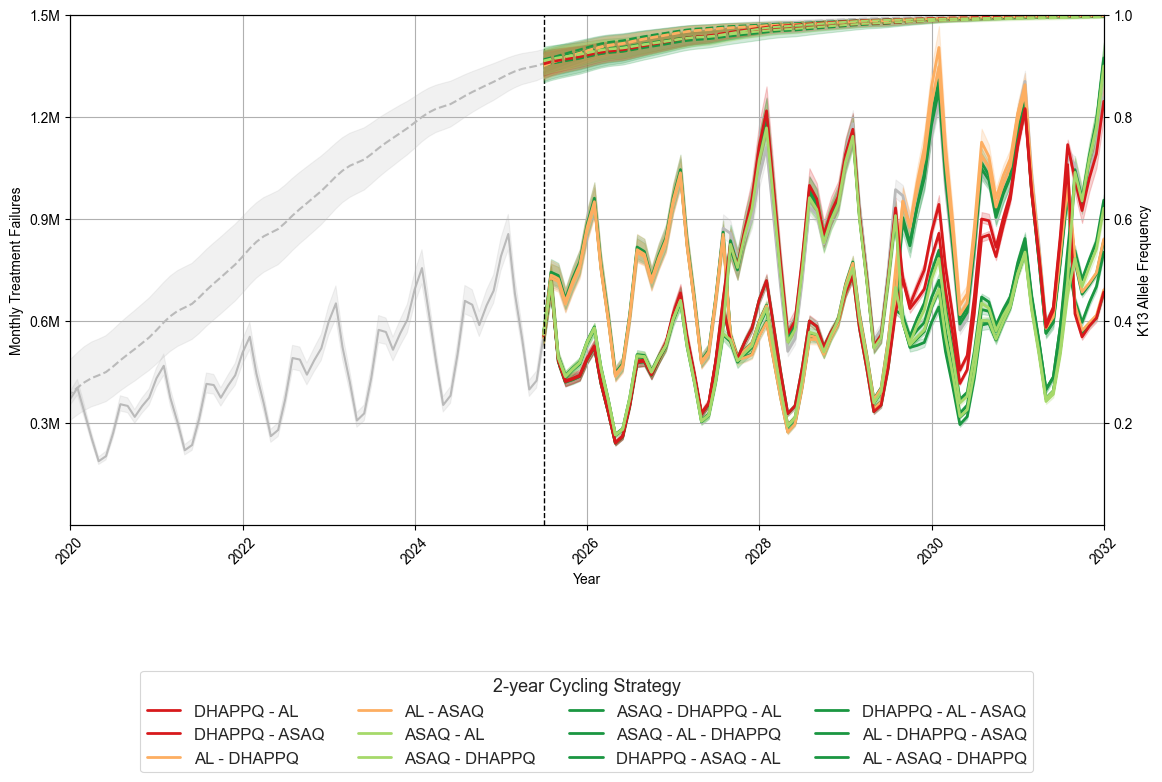

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D
import pandas as pd

# Load data
df = pd.read_csv("data/figS4_data.csv", parse_dates=["date"])
critical_point = pd.to_datetime("2025-07-01")


scenarios_to_plot = [
    "status_quo",
    # Dark green scenarios first
    "cycling_asaq_dhappq_al_2y", "cycling_asaq_al_dhappq_2y",
    "cycling_dhappq_asaq_al_2y", "cycling_dhappq_al_asaq_2y",
    "cycling_al_dhappq_asaq_2y", "cycling_al_asaq_dhappq_2y",
    # Then the rest
    "cycling_al_dhappq_2y", "cycling_al_asaq_2y",
    "cycling_dhappq_al_2y", "cycling_dhappq_asaq_2y",
    "cycling_asaq_al_2y", "cycling_asaq_dhappq_2y"
]

filtered_data = df[df["scenario"].isin(scenarios_to_plot)]

# Formatter
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'

# Colors
cold_color = '#bababa'
palette_after = {
    "status_quo": "#bababa",
    "cycling_dhappq_al_2y": "#d7191c",
    "cycling_dhappq_asaq_2y": "#d7191c",
    "cycling_al_dhappq_2y": "#fdae61",
    "cycling_al_asaq_2y": "#fdae61",
    "cycling_asaq_al_2y": "#a6d96a",
    "cycling_asaq_dhappq_2y": "#a6d96a",
    "cycling_asaq_dhappq_al_2y": "#1a9641",
    "cycling_asaq_al_dhappq_2y": "#1a9641",
    "cycling_dhappq_asaq_al_2y": "#1a9641",
    "cycling_dhappq_al_asaq_2y": "#1a9641",
    "cycling_al_dhappq_asaq_2y": "#1a9641",
    "cycling_al_asaq_dhappq_2y": "#1a9641",
}

# Labels for legend
scenario_labels = {
    "cycling_dhappq_al_2y": "DHAPPQ - AL",
    "cycling_dhappq_asaq_2y": "DHAPPQ - ASAQ",
    "cycling_al_dhappq_2y": "AL - DHAPPQ",
    "cycling_al_asaq_2y": "AL - ASAQ",
    "cycling_asaq_al_2y": "ASAQ - AL",
    "cycling_asaq_dhappq_2y": "ASAQ - DHAPPQ",
    "cycling_asaq_dhappq_al_2y": "ASAQ - DHAPPQ - AL",
    "cycling_asaq_al_dhappq_2y": "ASAQ - AL - DHAPPQ",
    "cycling_dhappq_asaq_al_2y": "DHAPPQ - ASAQ - AL",
    "cycling_dhappq_al_asaq_2y": "DHAPPQ - AL - ASAQ",
    "cycling_al_dhappq_asaq_2y": "AL - DHAPPQ - ASAQ",
    "cycling_al_asaq_dhappq_2y": "AL - ASAQ - DHAPPQ",
}

# Setup figure
fig, ax1 = plt.subplots(figsize=(12, 10))
ax2 = ax1.twinx()

sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
pre = filtered_data[(filtered_data["date"] <= critical_point)]
sns.lineplot(data=pre, x="date", y="total_treatmentfailures", ax=ax1,
                 color=cold_color, lw=1.5, alpha=1, zorder=1, errorbar=("pi", 90))
# Plot K13 frequency
sns.lineplot(data=pre, x="date", y="k13_frequency", ax=ax2,
                 color=cold_color, lw=1.5, alpha=1, zorder=1, linestyle='--', errorbar=("pi", 90))
# Plot data
for scenario in scenarios_to_plot:

    post = filtered_data[(filtered_data["scenario"] == scenario) & (filtered_data["date"] >= critical_point)]

    # Plot treatment failures
    sns.lineplot(data=post, x="date", y="total_treatmentfailures", ax=ax1,
                 color=palette_after[scenario], lw=2, zorder=2, errorbar=("pi", 90))


    sns.lineplot(data=post, x="date", y="k13_frequency", ax=ax2,
                 color=palette_after[scenario], lw=1.5, zorder=2, linestyle='--', errorbar=("pi", 90))

# Vertical policy change line
ax1.axvline(critical_point, color='black', linestyle='--', lw=1, zorder=3)

# Axis formatting
# Left Y-axis (Treatment Failures)
ax1.set_ylabel("Monthly Treatment Failures")
ax1.set_ylim([0, 1.5e6])
left_yticks = [0.3e6 * i for i in range(1, 6)]  # [0.3e6, 0.6e6, ..., 1.5e6]
ax1.set_yticks(left_yticks)
ax1.yaxis.set_major_formatter(millions_formatter)

# Right Y-axis (K13 Frequency)
ax2.set_ylabel("K13 Allele Frequency")
ax2.set_ylim([0, 1.0])
right_yticks = [round(0.2 * i, 1) for i in range(1, 6)]  # [0.2, 0.4, ..., 1.0]
ax2.set_yticks(right_yticks)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x:.1f}"))


# X-axis
ax1.set_xlim([pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01")])
ax1.set_xlabel("Year")
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, axis='both')
ax2.grid(False)

# Custom legend
custom_handles = [
    Line2D([0], [0], color=palette_after[key], lw=2)
    for key in scenario_labels
]
ax1.legend(custom_handles, scenario_labels.values(), title="2-year Cycling Strategy",
           loc='lower center', bbox_to_anchor=(0.5, -0.5),
           ncol=4, 
           fancybox=True, frameon=True, fontsize=12, title_fontsize=13)
           

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("figure_S4.png", dpi=300, bbox_inches='tight')
plt.show()


# Figure S8

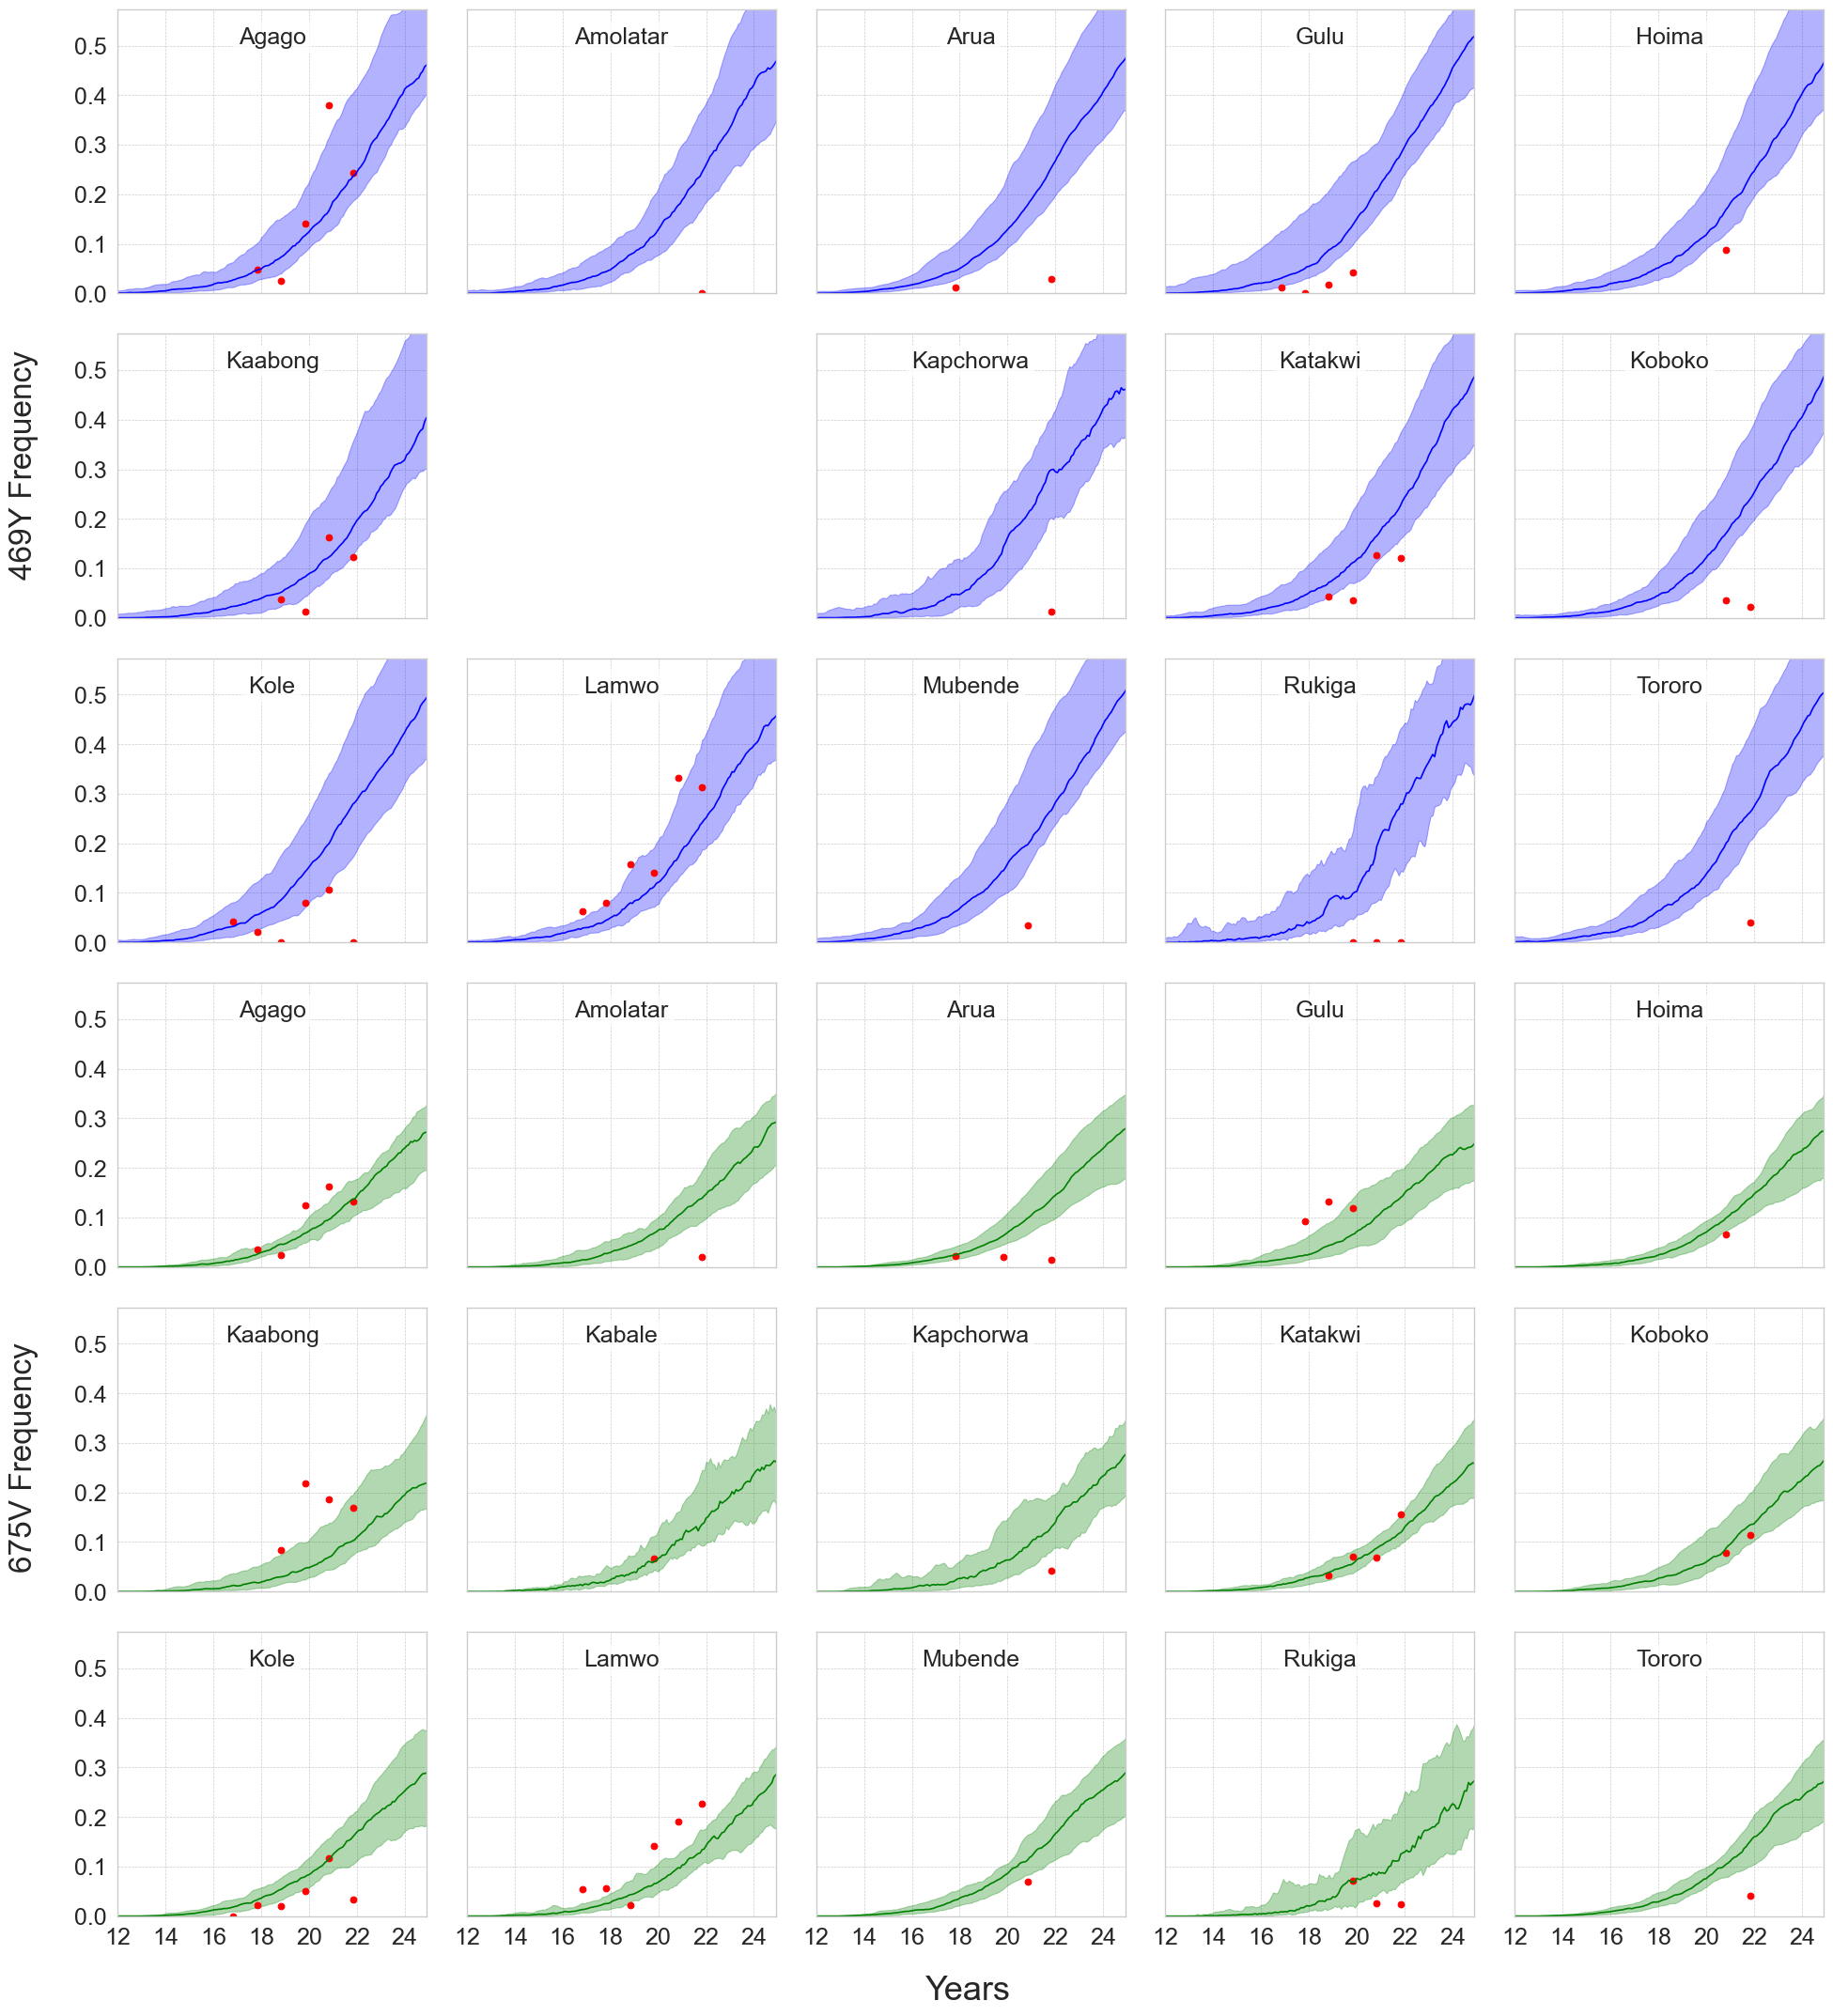

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# LOAD THE DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
status_quo_k13_quantiled_df = pd.read_csv('./data/figS8_data/status_quo_k13_quantiled_0002_v2.csv')
uga_469Y_mutations_df = pd.read_csv('./data/figS8_data/uga_469Y_mutations.csv')
uga_675V_mutations_df = pd.read_csv('./data/figS8_data/uga_675V_mutations.csv')
uga_districts_df = pd.read_csv('./data/figS8_data/uga_districts.csv')

# Identify unique districts
unique_districts_469Y = set(uga_469Y_mutations_df['District'].unique())
unique_districts_675V = set(uga_675V_mutations_df['District'].unique())
combined_unique_districts = unique_districts_469Y.union(unique_districts_675V)

# Map district names to their respective IDs and filter status_quo_k13_quantiled_df
district_id_map = uga_districts_df.set_index('Label')['ID'].to_dict()

# Filter datasets based on locations specific to each mutation dataset
district_ids_469Y = [district_id_map[district] for district in unique_districts_469Y if district in district_id_map]
district_ids_469Y.append(40)
filtered_status_quo_469Y_df = status_quo_k13_quantiled_df[status_quo_k13_quantiled_df['locationid'].isin(district_ids_469Y)]

district_ids_675V = [district_id_map[district] for district in unique_districts_675V if district in district_id_map]
filtered_status_quo_675V_df = status_quo_k13_quantiled_df[status_quo_k13_quantiled_df['locationid'].isin(district_ids_675V)]


# Invert the district_id_map for easy plotting
id_to_district_map = {v: k for k, v in district_id_map.items()}

# Variables for adjustments
start_display_year = 2012
end_display_year = 2024
year_interval = 2
fontsize = 20  # Font size for the graphs

# Calculate monthlydataid corresponding to the start and end years
start_year = 2004
months_per_year = 12
start_monthly_id = (start_display_year - start_year) * months_per_year + 1
end_monthly_id = (end_display_year - start_year + 1) * months_per_year

# Create a list of years to display on the x-axis
years_to_display = list(range(start_display_year, end_display_year + 1, year_interval))
monthly_ids_to_display = [(year - start_year) * months_per_year + 1 for year in years_to_display]
year_labels = [str(year)[-2:] for year in years_to_display]

# Determine number of columns for subplots
num_columns = 5

# Determine number of rows for each plot
unique_locations_469Y = filtered_status_quo_469Y_df['locationid'].unique()
num_rows_469Y = (len(unique_locations_469Y) + num_columns - 1) // num_columns

unique_locations_675V = filtered_status_quo_675V_df['locationid'].unique()
# move 40 to the end
unique_locations_675V = list(unique_locations_675V)
# unique_locations_675V.remove(40)
# unique_locations_675V.append(40)

num_rows_675V = (len(unique_locations_675V) + num_columns - 1) // num_columns
# Compute shared y-axis limits
min_469Y = min(filtered_status_quo_469Y_df['469Y_25th_percentile'].min(), filtered_status_quo_469Y_df['469Y_75th_percentile'].min())
max_469Y = max(filtered_status_quo_469Y_df['469Y_25th_percentile'].max(), filtered_status_quo_469Y_df['469Y_75th_percentile'].max())

min_675V = min(filtered_status_quo_675V_df['675V_25th_percentile'].min(), filtered_status_quo_675V_df['675V_75th_percentile'].min())
max_675V = max(filtered_status_quo_675V_df['675V_25th_percentile'].max(), filtered_status_quo_675V_df['675V_75th_percentile'].max())


# Combined figure
fig, axes = plt.subplots(nrows=num_rows_469Y + num_rows_675V, ncols=num_columns, figsize=(20, 4 * (num_rows_469Y + num_rows_675V)), sharex='col', sharey=False)

# Plot for 469Y
for idx, location in enumerate(unique_locations_469Y):
    # last idx
    row, col = divmod(idx, num_columns)
    district_name = id_to_district_map[location]
    subset = filtered_status_quo_469Y_df[filtered_status_quo_469Y_df['locationid'] == location]
    mutation_data = uga_469Y_mutations_df[uga_469Y_mutations_df['District'] == district_name]
    
    ax = axes[row, col]
    ax.plot(subset['monthlydataid'], subset['469Y_median'], color='blue')
    ax.fill_between(subset['monthlydataid'], subset['469Y_05th_percentile'], subset['469Y_95th_percentile'], color='blue', alpha=0.3)
    
    # Place title inside the plot
    ax.text(0.5, 0.9, district_name, fontsize=fontsize-2, transform=ax.transAxes, 
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    
    
    for year, frequency in zip(mutation_data['Year'], mutation_data['Frequency']):
        monthly_id_start = (year - start_year) * months_per_year + 11
        ax.scatter(monthly_id_start, frequency, color='red', marker='o')
    
    # ax.set_title(district_name, fontsize=fontsize)
    ax.set_xlim([start_monthly_id, end_monthly_id])
    ax.set_xticks(monthly_ids_to_display)
    ax.set_xticklabels(year_labels, fontsize=fontsize - 2)
    ax.set_ylim([0, max_469Y])
    ax.tick_params(axis='y', labelsize=fontsize - 2)
    # not first column
    if col != 0:
        ax.set_yticklabels([])
        
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot for 675V
for idx, location in enumerate(unique_locations_675V):
    row, col = divmod(idx, num_columns)
    row += num_rows_469Y  # Offset by the number of rows for 469Y
    district_name = id_to_district_map[location]
    subset = filtered_status_quo_675V_df[filtered_status_quo_675V_df['locationid'] == location]
    mutation_data = uga_675V_mutations_df[uga_675V_mutations_df['District'] == district_name]
    
    ax = axes[row, col]
    ax.plot(subset['monthlydataid'], subset['675V_median'], color='green')
    ax.fill_between(subset['monthlydataid'], subset['675V_05th_percentile'], subset['675V_95th_percentile'], color='green', alpha=0.3)
    
    # Place title inside the plot
    ax.text(0.5, 0.9, district_name, fontsize=fontsize-2, transform=ax.transAxes, 
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    for year, frequency in zip(mutation_data['Year'], mutation_data['Frequency']):
        monthly_id_start = (year - start_year) * months_per_year + 11
        ax.scatter(monthly_id_start, frequency, color='red', marker='o')
    
    # ax.set_title(district_name, fontsize=fontsize)
    ax.set_xlim([start_monthly_id, end_monthly_id])
    ax.set_xticks(monthly_ids_to_display)
    ax.set_xticklabels(year_labels, fontsize=fontsize - 2)
    
    ax.set_ylim([0, max_469Y])
    ax.tick_params(axis='y', labelsize=fontsize - 2)
    # ax.set_yticks([0.0,0.1,0.2,0.3])
    if col != 0:
        ax.set_yticklabels([])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)



# Remove unused subplots
# for i in range(len(unique_locations_469Y) + len(unique_locations_675V), len(axes.flat)):
    # fig.delaxes(axes.flat[i])
    

# fig.delaxes(axes.flat[len(unique_locations_469Y)])

# remove ax [1,1]
fig.delaxes(axes[1,1])

# Add y-labels for each plot section
fig.text(0.02, 0.71, '469Y Frequency', va='center', rotation='vertical', fontsize=fontsize+4)
fig.text(0.02, 0.27, '675V Frequency', va='center', rotation='vertical', fontsize=fontsize+4)

fig.suptitle('Years', x=0.53, y=0.04, fontsize=fontsize + 6)


plt.tight_layout(rect=[0.04, 0.04, 1, 0.95])
plt.show()

fig.savefig("figure_S8.png", dpi=300)


# Figure S9

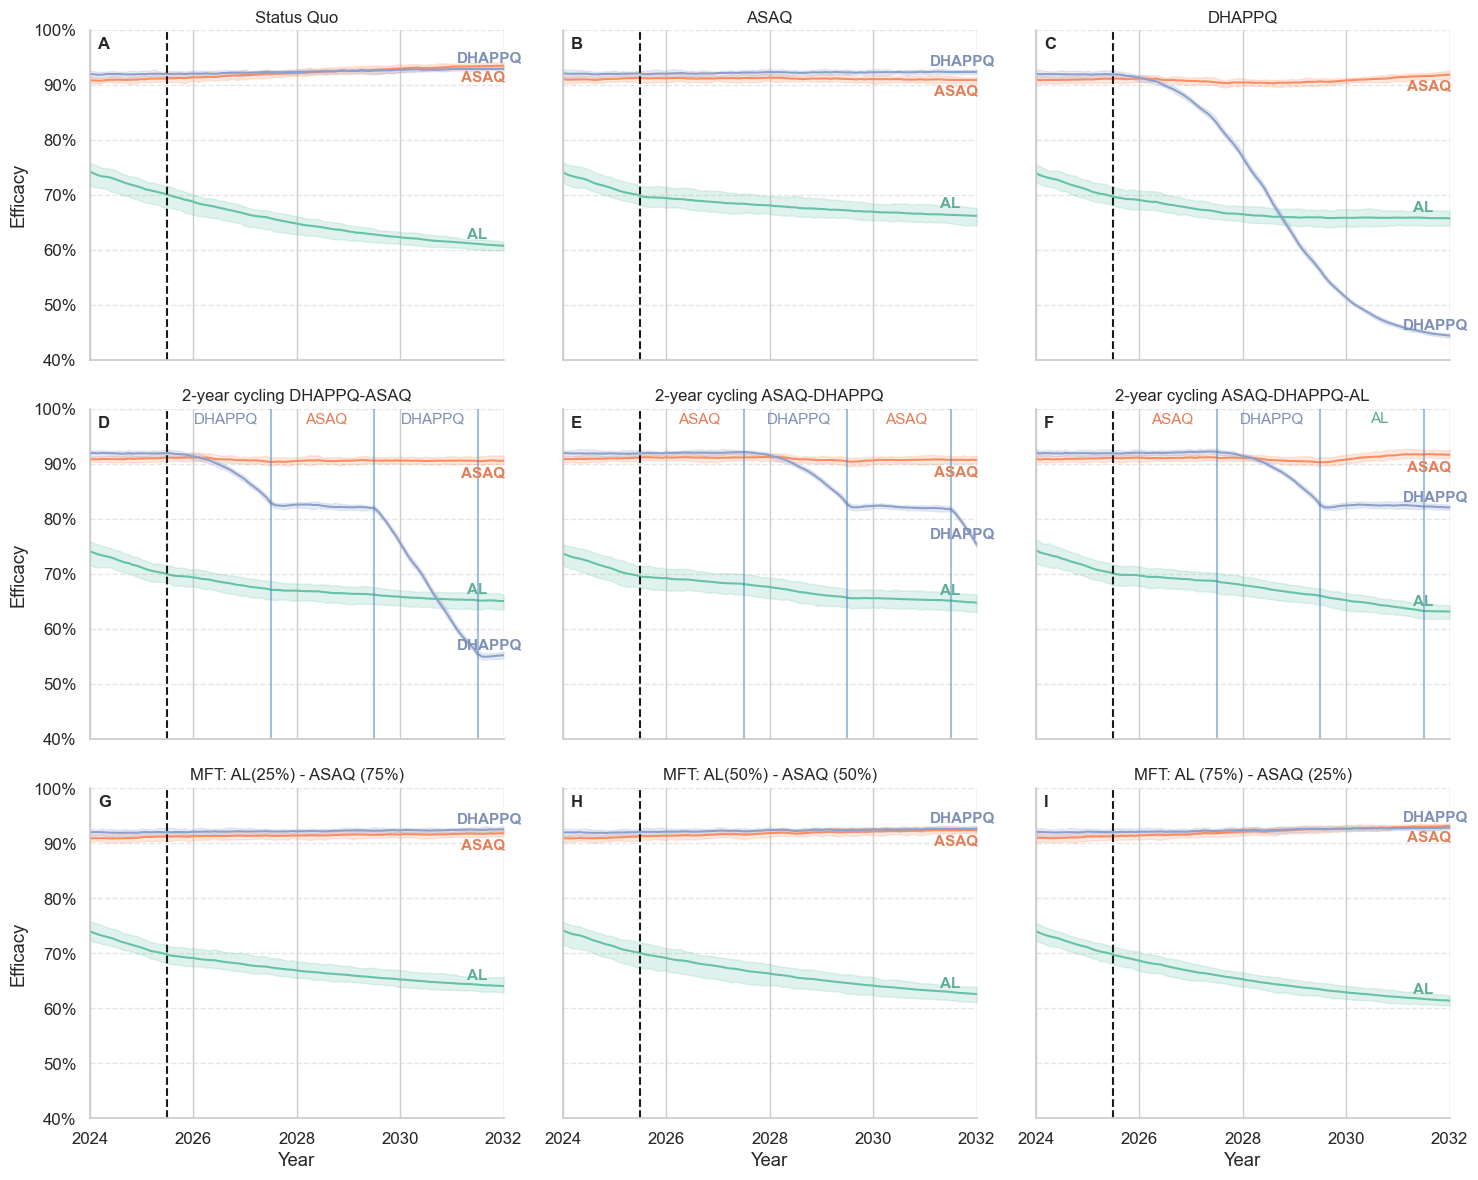

In [3]:
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from matplotlib.dates import YearLocator, DateFormatter


main_folders = {
    "000_status_quo": {"title": "Status Quo"},
    "001_asaq": {"title": "ASAQ"},
    "002_dhappq": {"title": "DHAPPQ"},
    "008_cycling_dhappq_asaq_2y": {"title": "2-year cycling DHAPPQ-ASAQ"},
    "006_cycling_asaq_dhappq_2y": {"title": "2-year cycling ASAQ-DHAPPQ"},
    "012_cycling_asaq_dhappq_al_2y": {"title": "2-year cycling ASAQ-DHAPPQ-AL"},
    "015_mft_al25_asaq75": {"title": "MFT: AL(25%) - ASAQ (75%)"},
    "017_mft_al50_asaq50": {"title": "MFT: AL(50%) - ASAQ (50%)"},
    "019_mft_al75_asaq25": {"title": "MFT: AL (75%) - ASAQ (25%)"},
}
drug_labels = [
    ["AL"],
    ["ASAQ"],
    ["DHAPPQ"],
    ["DHAPPQ", "ASAQ", "DHAPPQ"],
    ["ASAQ", "DHAPPQ", "ASAQ"],
    ["ASAQ", "DHAPPQ", "AL"],
    ["AL", "ASAQ"],
    ["AL", "ASAQ"],
    ["AL", "ASAQ"],
    ]



# reset plot style, font size
sns.reset_defaults()
# increase font size
sns.set_theme(style="whitegrid", font_scale=1.1)


fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Format y-axis ticks as percentages
formatter = FuncFormatter(lambda y, _: f"{y:.0%}")   # 0.4 → "40%", 1.0 → "100%"

def darken(color, factor=0.9):
    return tuple([c * factor for c in color])

for idx, (main_folder, strategy) in enumerate(main_folders.items()):
    df_long = pd.read_csv(f"./data/figS9_data/{main_folder}_AL_ASAQ_DHAPPQ_efficacies.csv")
    df_long['date'] = pd.to_datetime(df_long['date'])
    
    # Make sure the palette is fixed and known
    drugs = sorted(df_long["Drug"].unique())
    palette_list = sns.color_palette("Set2", n_colors=len(drugs))
    palette = dict(zip(drugs, palette_list))

    ax = axes[idx]

    sns.lineplot(
        data=df_long,
        x="date", y="Efficacy",
        hue="Drug",
        ax=ax,
        errorbar=("pi", 90),
        palette=palette,
        legend=False
    )

    ax.set_xlim(datetime(2024, 1, 1), datetime(2032, 1, 1))
    # set x ticks every 2 years
    ax.xaxis.set_major_locator(YearLocator(2))
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.tick_params(axis='x', rotation=0)

    ax.set_ylim(0.4, 1.0)
    ax.set_title(strategy["title"], fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Efficacy")

    # Add panel letter in top-right corner (A, B, C, ...)
    panel_label = chr(ord("A") + idx)
    ax.text(0.02, 0.98, panel_label, transform=ax.transAxes,
            ha='left', va='top', fontsize=12, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.grid(axis='y')
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.label_outer()
    sns.despine(ax=ax)
    # lines annotation
    ax.axvline(x=datetime(2025, 7, 1), color='k', linestyle='--')
    if idx >=3 and idx <=5:
        ax.axvline(x=datetime(2027, 7, 1), color='#4682B4', linestyle='-', alpha=0.5)
        ax.axvline(x=datetime(2029, 7, 1), color='#4682B4', linestyle='-', alpha=0.5)
        ax.axvline(x=datetime(2031, 7, 1), color='#4682B4', linestyle='-', alpha=0.5)

    # --- Percentage y-axis ---
    formatter = FuncFormatter(lambda y, _: f"{y:.0%}")
    ax.yaxis.set_major_formatter(formatter)

    # --- Label annotations: color-coded & shifted left/right to avoid overlap ---
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x_range = x_max - x_min
    y_range = y_max - y_min

    # Base x position for labels (a bit inside the right edge)
    x_base = x_max - 0.05 * x_range
    dx = 0.015 * x_range          # horizontal spacing between labels
    dy = 0.02          # minimum vertical separation

    placed_ys = []

    for j, drug in enumerate(drugs):
        df_sub = df_long[df_long["Drug"] == drug].sort_values("date")

        # We only really care about the final Efficacy value for y
        y_last = df_sub.groupby("date")["Efficacy"].median().iloc[-1]

        # Shift labels left/right around x_base:
        # for 3 drugs → positions ~ [left, center, right] around x_base
        x_label = x_base + (j - (len(drugs) - 1) / 2) * dx
        y_label = y_last

        # switch case drug is DHAPPQ or AL
        if drug == "DHAPPQ" or drug == "AL":
            y_label += dy
        elif drug == "ASAQ":
            y_label -= dy
            

        placed_ys.append(y_label)

        txt = ax.text(
            x_label,
            y_label,
            drug,
            color=darken(palette[drug]),
            fontsize=11,
            fontweight="bold",
            ha="center",
            va="center"
        )
    
    # middle row add text annotations
    if idx in [3,4,5]:
        font_size = 11
        drug_labels_in_strategy = drug_labels[idx]
        norm_positions = [0.33, 0.57, 0.83]

        y_start = 0.95

        for j, lbl in enumerate(drug_labels_in_strategy):
            ax.text(norm_positions[j], y_start, lbl, transform=ax.transAxes, color=darken(palette[lbl]),
                    ha='center', va='bottom', fontsize=font_size, fontweight='normal')


plt.tight_layout()
plt.show()

# save figure
fig.savefig("figure_S9.png", dpi=300, bbox_inches='tight')


# Figure S10

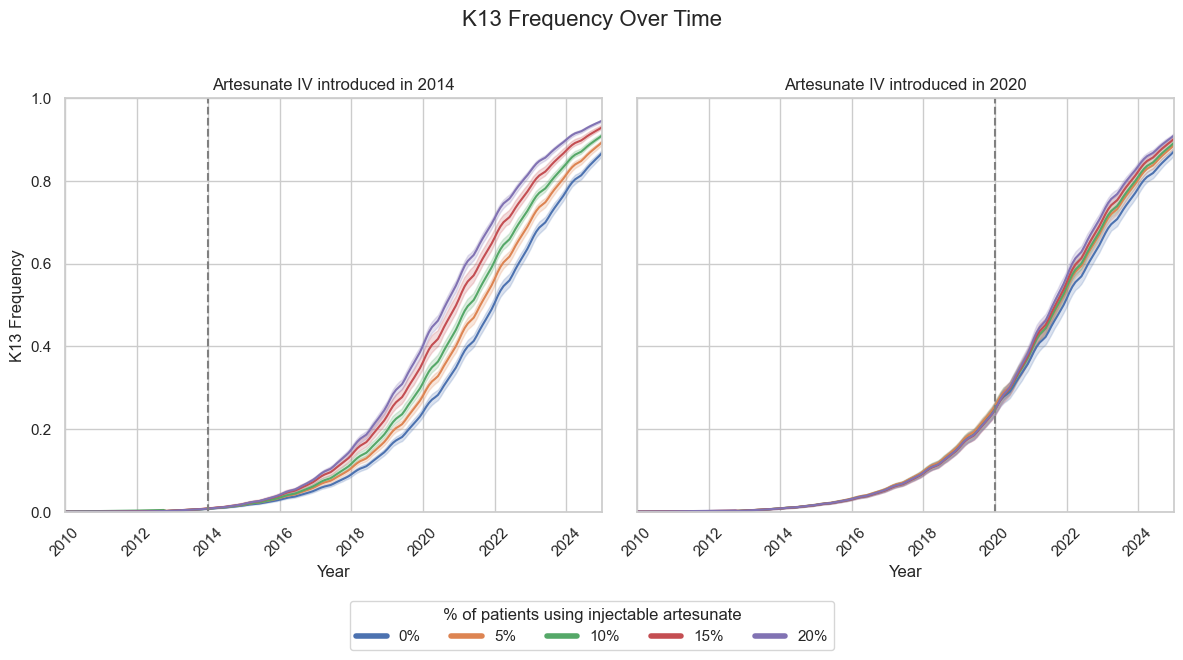

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style="whitegrid")

df_all = pd.read_csv("./data/figS10_data.csv", parse_dates=["date"])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey="row")
ax1, ax2 = axes[0], axes[1]

fig.suptitle("K13 Frequency Over Time", fontsize=16)

# top-left: 2014 linear
df_2014 = df_all[df_all["scenario"].str.contains("2014")]
sns.lineplot(data=df_2014, x="date", y="k13_frequency", hue="scenario", ax=ax1, legend=False)
ax1.set_title("Artesunate IV introduced in 2014")
ax1.set_xlabel("Year")
ax1.set_ylabel("K13 Frequency")
ax1.set_ylim(0,1)

# top-right: 2020 linear (keep legend to build global legend)
df_2020 = df_all[df_all["scenario"].str.contains("2020")]
sns.lineplot(data=df_2020, x="date", y="k13_frequency", hue="scenario", ax=ax2)
ax2.set_title("Artesunate IV introduced in 2020")
ax2.set_xlabel("Year")
ax2.set_ylabel("K13 Frequency")

def _scenario_label(s):
    try:
        val = float(s.split('-')[-1])
        return f"{int(val * 100)}%"
    except Exception:
        return s

# build a single legend from the top-right axis
handles, labels = ax2.get_legend_handles_labels()
if labels:
    new_labels = [_scenario_label(l) for l in labels]
    if ax2.get_legend() is not None:
        ax2.get_legend().remove()
    for h in handles:
        h.set_linewidth(4)
    fig.legend(handles, new_labels,
               title="% of patients using injectable artesunate",
               loc='lower center', ncol=len(new_labels),
               bbox_to_anchor=(0.5, -0.1), bbox_transform=fig.transFigure)

# vertical lines and x-limits for all axes
for ax, year in zip([ax1], ["2014-01-01"]):
    ax.axvline(pd.to_datetime(year), color='gray', linestyle='--')
for ax, year in zip([ax2], ["2020-01-01"]):
    ax.axvline(pd.to_datetime(year), color='gray', linestyle='--')

for ax in axes.ravel():
    ax.set_xlim(pd.to_datetime("2010-01-01"), pd.to_datetime("2025-1-1"))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# save figure
fig.savefig("figure_S10.png", bbox_inches='tight', dpi=300)
